<a href="https://colab.research.google.com/github/bray4403/William-Ava-Spotify-Combined/blob/main/WillMDST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
#import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# @title
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 5.7 MB/s eta 0:00:00


In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
df1 = pd.read_json("/content/drive/MyDrive/MDSTwill/StreamingHistory_music_0.json")
df2 = pd.read_json("/content/drive/MyDrive/MDSTwill/StreamingHistory_music_1.json")
df3 = pd.read_json("/content/drive/MyDrive/MDSTwill/StreamingHistory_music_2.json")


In [6]:
df = pd.concat([df1,df2,df3], ignore_index=True)

In [7]:
df.head(5)

,endTime,artistName,trackName,msPlayed
0,2023-02-13 17:56,Rihanna,Hate That I Love You,4514
1,2023-02-14 00:05,Johann Sebastian Bach,"Cello Suite No. 1 in G Major, BWV 1007: I. Pré...",151480
2,2023-02-14 00:12,Gabriel Fauré,"Fauré: Pavane, Op. 50",385857
3,2023-02-14 00:19,Wolfgang Amadeus Mozart,"Serenade In G Major ""Eine Kleine Nachtmusik"", ...",466133
4,2023-02-14 00:22,Giuseppe Verdi,La traviata / Act I: Libiamo ne'lieti calici,175506


In [19]:
print(df.columns)

Index(['endTime', 'artistName', 'trackName', 'msPlayed'], dtype='object')


In [8]:
artistNames = set(df['artistName'])

In [ ]:
artistNames

In [23]:
len(artistNames)

1711

In [ ]:
artistGenreMap = {key: None for key in artistNames}
artistGenreMap

In [10]:
client_id = '92639a7aa5e74844bd66b05aa338baa6'
client_secret = '2f844955ada549bb85a996bf478002b8'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [11]:
import time

In [12]:
print(artistGenreMap['SZA'])

None


In [13]:
for artist in artistGenreMap:
  if artistGenreMap[artist] is None:
    artistGenreMap[artist] = sp.search(q=artist, type='artist')

data for preferred decade analysis(e.g. music from the early 2000s vs the 1980's) could be done by pulling "['track']['album']['release_date']"

https://stackoverflow.com/questions/40737168/get-track-release-date-in-spotify

In [14]:
for artist in artistGenreMap:
    if artistGenreMap[artist]:
        print(artistGenreMap[artist]) #dict
        print(artistGenreMap[artist]['artists']) #dict
        print(type(artistGenreMap[artist]['artists']['items']))#list
        artistInfo = artistGenreMap[artist]['artists']['items'][0]
        print(artistInfo['genres'])
        break

{'artists': {'href': 'https://api.spotify.com/v1/search?query=Yung+Lean&type=artist&offset=0&limit=10', 'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/67lytN32YpUxiSeWlKfHJ3'}, 'followers': {'href': None, 'total': 908441}, 'genres': ['cloud rap', 'psychedelic hip hop', 'underground hip hop'], 'href': 'https://api.spotify.com/v1/artists/67lytN32YpUxiSeWlKfHJ3', 'id': '67lytN32YpUxiSeWlKfHJ3', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab6761610000e5eb24452fbff8e0a20ebd6f92b2', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/ab6761610000517424452fbff8e0a20ebd6f92b2', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/ab6761610000f17824452fbff8e0a20ebd6f92b2', 'width': 160}], 'name': 'Yung Lean', 'popularity': 66, 'type': 'artist', 'uri': 'spotify:artist:67lytN32YpUxiSeWlKfHJ3'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/7u3rrDdkwFEPxYP9zh3e3v'}, 'followers': {'href': None, 'total': 4}, 'genres': [],

reran cell where defined sp because there was a connection error

In [15]:
updatedArtistToGenreMap = {}
for artist in artistGenreMap:
    try:
        updatedArtistToGenreMap[artist] =  artistGenreMap[artist]['artists']['items'][0]['genres']
    except:
        updatedArtistToGenreMap[artist] = None

In [17]:
df['artist_genres'] = df['artistName'].map(updatedArtistToGenreMap)

In [26]:
df = df.drop('endTime',axis = 1)

In [27]:
df.to_csv('demoDataWithGenres.csv')

In [19]:
preListOfGenres = df['artist_genres'].tolist()

In [20]:
listOfGenres = []

In [21]:
for aL in preListOfGenres:
    if aL is not None:
        listOfGenres.extend(aL)

In [22]:
from wordcloud import WordCloud
import collections

In [23]:
counter = collections.Counter(listOfGenres)
genreFrequencies = dict(counter)

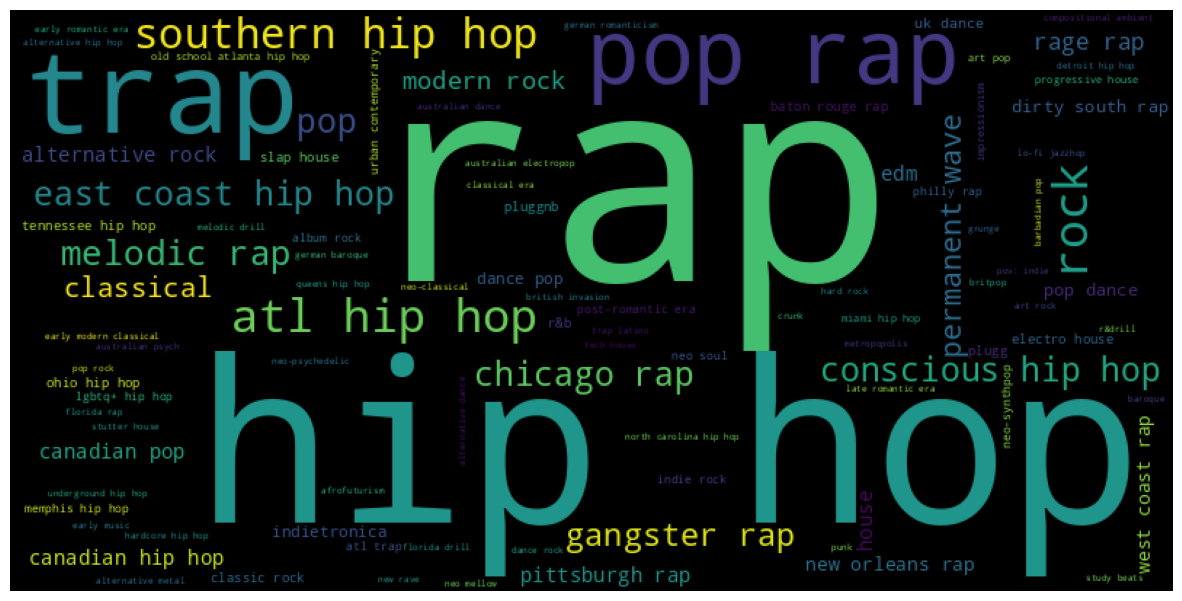

In [24]:
def plot_cloud(wordcloud):
    fig = matplotlib.pyplot.figure(figsize=(15,8))
    matplotlib.pyplot.imshow(wordcloud)
    matplotlib.pyplot.axis("off");
wordcloud = WordCloud(width=800,height=400, max_words=100,relative_scaling=1,normalize_plurals=False,
                      collocations=False).generate_from_frequencies(genreFrequencies)
plot_cloud(wordcloud)

In [25]:
df['ts'] = pd.to_datetime(df['ts'])

# Change the format of the timestamps
df['ts'] = df['ts'].dt.strftime('%Y-%m-%d %H:%M')

df["Play-Time"]= pd.to_datetime(df["ts"]) # To create a additional column
df['year'] = pd.DatetimeIndex(df["Play-Time"]).year
df['month'] = pd.DatetimeIndex(df["Play-Time"]).month
df['day'] = pd.DatetimeIndex(df["Play-Time"]).day
df['weekday'] = pd.DatetimeIndex(df["Play-Time"]).weekday
df['time'] = pd.DatetimeIndex(df["Play-Time"]).time
df['hours'] = pd.DatetimeIndex(df["Play-Time"]).hour
df['day-name'] = df["Play-Time"].apply(lambda x: x.day_name())
df['Count'] = 1

df["Time-Played (hh-mm-ss)"] = pd.to_timedelta(df["ms_played"], unit='ms')
def hours(td):
    # To get the hour information
    return td.seconds/3600

def minutes(td):
    # To get the minutes information
    return (td.seconds/60)%60

df["Listening Time(Hours)"] = df["Time-Played (hh-mm-ss)"].apply(hours).round(3)
df["Listening Time(Minutes)"] = df["Time-Played (hh-mm-ss)"].apply(minutes).round(3)






KeyError: 'ts'

In [ ]:
fav_songs = df.groupby(["master_metadata_track_name"])["Count"].count()



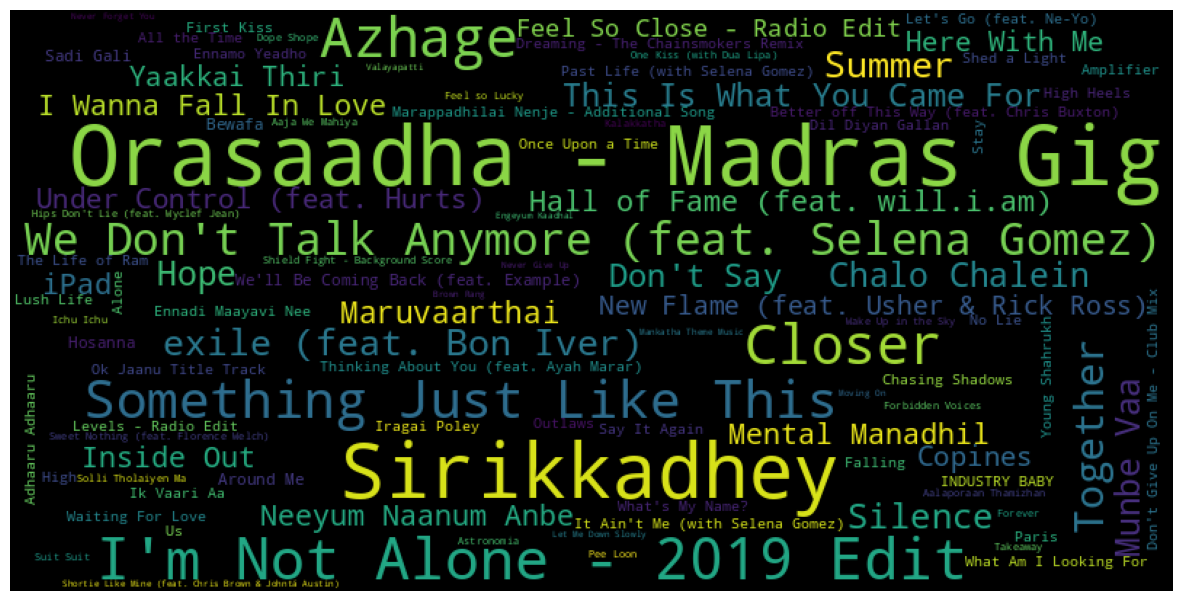

In [ ]:

def plot_cloud(wordcloud):
    fig = matplotlib.pyplot.figure(figsize=(15,8))
    matplotlib.pyplot.imshow(wordcloud)
    matplotlib.pyplot.axis("off");
wordcloud = WordCloud(width=800,height=400, max_words=100,relative_scaling=1,normalize_plurals=False,
                      collocations=False).generate_from_frequencies(fav_songs)
plot_cloud(wordcloud)

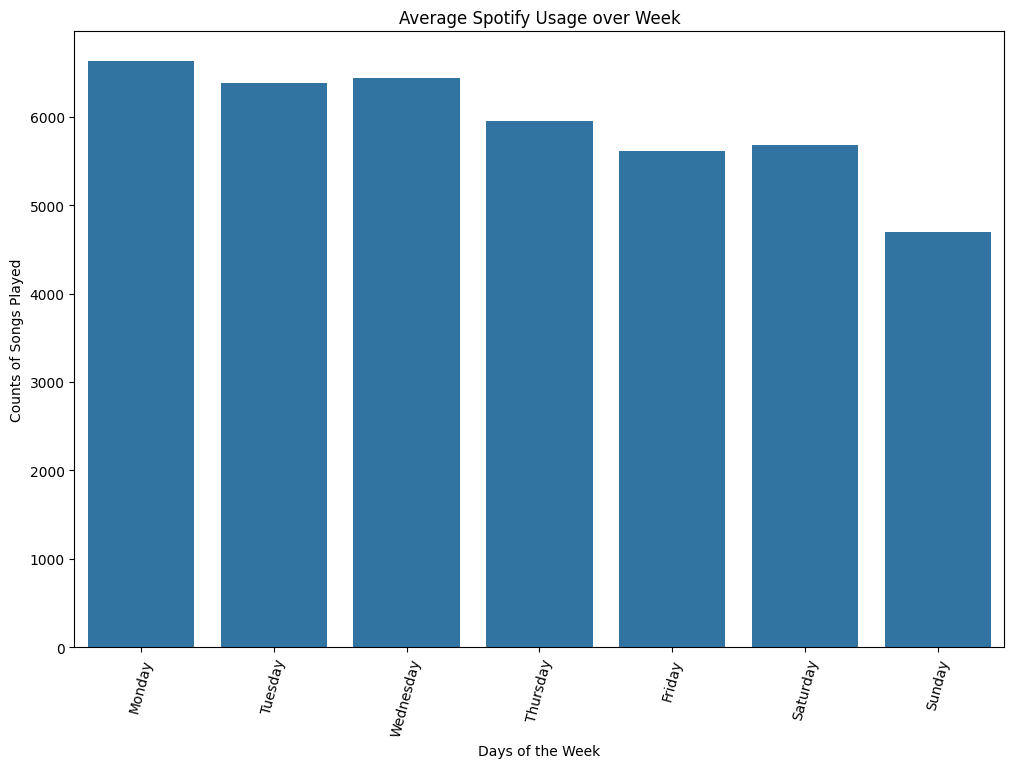

In [ ]:
fig, ax = matplotlib.pyplot.subplots(figsize=(12,8))
ax = sns.countplot(x=df["day-name"],ax=ax)
matplotlib.pyplot.xticks(rotation=75);
ax.set(title="Average Spotify Usage over Week",xlabel="Days of the Week",ylabel="Counts of Songs Played");

